# 路径和参数

In [2]:
cache_dir='./.cache'
train_data_path='./train.json'
test_data_path='./test.json'
uncategorized_expression_path='./uncategorized_expression.json'
expression_map_path='./expression_map.json'
merged_content_path='./all_content.json'
merged_interview_path='./all_interview.json'
merged_history_path='./all_history.txt'
test_data_size=200
tokenizer_name='D:\ml\chatglm-6b-int4-qe'
roleplay_propotion=.7
interview_propotion=.3

max_history_tokens=350
max_prompt_tokens=380
# bg_hint_num=2
bg_hint_num=0



output_dir='./output_shana/'

faiss_path=output_dir+'faiss_index'

# 读取,清理并合并返回的json

In [3]:
import json,random
from glob import glob


def purge_content1(content):
    for item in content:
        if 'char' in item:
            char_and_exp={'char':item['char']}
            if 'expression' in item:
                char_and_exp['expression']=item['expression']
            if 'say' in item and item['say'] is not None and len(item['say'])>0:
                yield {**char_and_exp, 'say': item['say']}
            if 'think' in item and item['think'] is not None and len(item['think'])>0:
                yield {'char': item['char'], 'think': item['think']}
            if 'act' in item and item['act'] is not None and len(item['act'])>0:
                yield {**char_and_exp,  'act': item['act']}
            # if not any(k in item for k in ['say', 'think', 'act']):
            #     yield char_and_exp
        if 'info' in item:
            yield {'info': item['info']}

# combine continuous say
def purge_content2(content):
    prev_item={}
    for item in content:
        if 'say' in item:
            if 'say' in prev_item and item.get('char', 'ERROR1')==prev_item.get('char', 'ERROR2'):
                prev_item['say']+=item['say']
                continue
        if len(prev_item)>0:
            yield prev_item
        prev_item=item
    if len(prev_item)>0:
        yield prev_item

def purge_content(content):
    return purge_content2(purge_content1(content))

contents=[]
for path in glob(f'{cache_dir}/LOG_RESPONSE_*.json'):
    with open(path, 'r', encoding='utf-8') as f:
        try:
            content=json.load(f)
            content['content']=list(purge_content(content['content']))
            content['id']=int(path.split('_')[-1].split('.')[0])
            for item in content['content']:
                item['src_id']=content['id']
            contents.append(content)
        except Exception as e:
            print('Error:', path, e)
            raise e
contents=sorted(contents, key=lambda x: x['id'])


all_content=[]
for content in contents:
    for item in content['content']:
        all_content.append(item)

for item in random.sample(all_content, 10):    
    print(item)
    
print('Total content chunks:', len(contents))
print('Total items:', len(all_content))

json.dump(all_content, open(merged_content_path, 'w', encoding='utf-8'), ensure_ascii=False, indent=2)

{'char': '千草', 'say': '这是我家呀。贯太郎他开的玩笑，基本上都是一些不好笑却会吓着人的东西……', 'src_id': 1063}
{'char': '白色长袍', 'say': '回答只要一次就够了知道吗——？多米诺——', 'src_id': 664}
{'char': '梅利希姆', 'think': '男人的猛烈嫉妒心和愤怒涌上心头', 'src_id': 1561}
{'char': '玛琼琳', 'say': '我要是不啃声，你又会喝得乱七八糟', 'src_id': 343}
{'info': '被砍断的左臂顿时消散无踪', 'src_id': 199}
{'char': '维奈', 'think': '认为少女是白痴', 'src_id': 587}
{'info': '全班同学都觉得是一种很冷的笑话', 'src_id': 239}
{'info': '那是昨天，坂井悠二忘了带回家的雨伞。', 'src_id': 361}
{'char': 'unknown', 'think': '露出了犹豫的神色', 'src_id': 1153}
{'char': '佐藤', 'expression': '贼笑', 'say': '原~来如此，嗯嗯，果然没错，多多加油吧！', 'src_id': 133}
Total content chunks: 1650
Total items: 22765


In [4]:
import json,random
from glob import glob

interviews=[]
for path in glob(f'{cache_dir}/INFO_RESPONSE_*.json'):
    with open(path, 'r', encoding='utf-8') as f:
        try:
            interview=json.load(f)
            interview['id']=int(path.split('_')[-1].split('.')[0])
            for item in interview['content']:
                item['src_id']=interview['id']
            interviews.append(interview)
        except Exception as e:
            print('Error:', path, e)
            raise e
interviews=sorted(interviews, key=lambda x: x['id'])

print('Total interview chunks:', len(interviews))

all_interview=[]
for interview in interviews:
    for item in interview['content']:
        all_interview.append(item)

print('Total interview items:', len(all_interview))

for item in random.sample(all_interview, 10):
    print(item)

json.dump(all_interview, open(merged_interview_path, 'w', encoding='utf-8'), ensure_ascii=False, indent=2)

Total interview chunks: 1202
Total interview items: 8319
{'respondent': '蒂丽亚', 'ask': '你为什么要在再生与防御这两个方面下功夫？', 'answer': '因为这两个方面是治疗和保护的关键。', 'src_id': 473}
{'respondent': '马克西亚司', 'ask': '你为什么觉得玛婕莉·朵有资格批评你？', 'answer': '因为她觉得我做事老是一副吊儿郎当的腔调，才害我们到现在还抓不到拉米这样弱到没边的废材。', 'src_id': 146}
{'respondent': '亚拉斯特尔', 'ask': '你认为自由会让人不知所措吗？', 'answer': '只要随时保持警觉，遇到状况再去思考能做什么就行了。', 'src_id': 225}
{'respondent': '千草', 'ask': '你对待客人的态度是怎样的？', 'answer': '我若无其事地站了起来，面带一丝微笑，向面部表情僵硬的威尔艾米娜问道。', 'src_id': 1031}
{'respondent': '玛琼琳', 'ask': '田中的身高是多少？', 'answer': '与我差不多高。', 'src_id': 231}
{'respondent': '吉田', 'ask': '我为什么会感到烦恼？', 'answer': '因为我不敢对同班同学坂井悠二说喜欢他。', 'src_id': 719}
{'respondent': '吉田一美', 'ask': '你为什么会对外国少年的话感到不敢置信？', 'answer': '因为他的声音沧桑老练，而且他能够清晰地传至我耳中，还有他手背中央的伤疤和割伤与皱缩的伤痕让我感到诡异。', 'src_id': 674}
{'respondent': '蒂雅玛特', 'ask': '你对威尔艾米娜的猜测有什么看法？', 'answer': '赞同。', 'src_id': 585}
{'respondent': '亚拉斯特尔', 'ask': '有什么事情吗？', 'answer': '现在太阳已经下山了。', 'src_id': 81}
{'respondent': '夏娜', 'ask': '为什么你拒绝了邀约？', 'a

### 对话长度的统计

c:\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


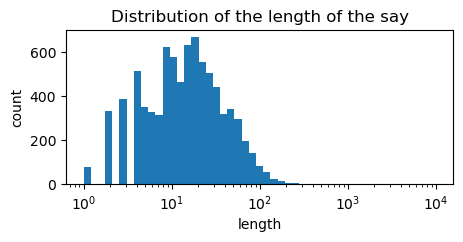

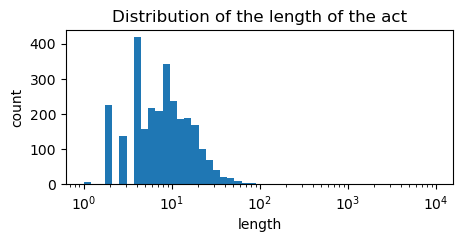

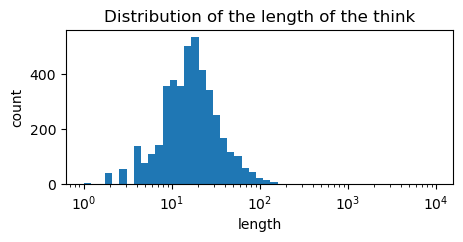

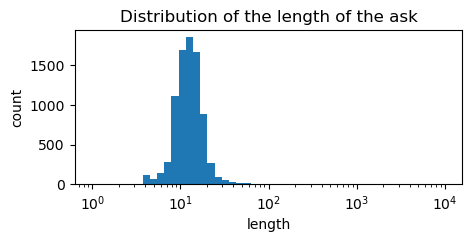

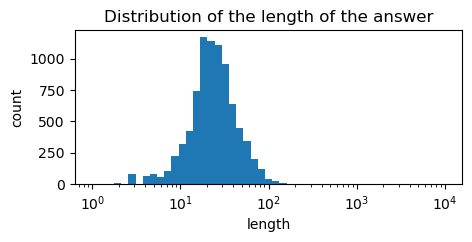

In [5]:
# draw the distribution of the length of the say in loglog scale
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 2))
plt.hist([len(item['say']) for item in all_content if 'say' in item], bins=np.logspace(0, 4, 50))
plt.xscale('log');plt.xlabel('length');plt.ylabel('count');plt.title('Distribution of the length of the say');plt.show()

plt.figure(figsize=(5, 2))
plt.hist([len(item['act']) for item in all_content if 'act' in item], bins=np.logspace(0, 4, 50))
plt.xscale('log');plt.xlabel('length');plt.ylabel('count');plt.title('Distribution of the length of the act');plt.show()

plt.figure(figsize=(5, 2))
plt.hist([len(item['think']) for item in all_content if 'think' in item], bins=np.logspace(0, 4, 50))
plt.xscale('log');plt.xlabel('length');plt.ylabel('count');plt.title('Distribution of the length of the think');plt.show()

plt.figure(figsize=(5, 2))
plt.hist([len(item['ask']) for item in all_interview if 'ask' in item], bins=np.logspace(0, 4, 50))
plt.xscale('log');plt.xlabel('length');plt.ylabel('count');plt.title('Distribution of the length of the ask');plt.show()

plt.figure(figsize=(5, 2))
plt.hist([len(item['answer']) for item in all_interview if 'answer' in item], bins=np.logspace(0, 4, 50))
plt.xscale('log');plt.xlabel('length');plt.ylabel('count');plt.title('Distribution of the length of the answer');plt.show()



### 统计角色出现的频率

In [6]:

rename_map={'少女':'夏娜','坂井悠二':'悠二','佐藤启作':'启作','田中荣太':'荣太','亚拉丝特尔':'亚拉斯特尔','主人公':'悠二'}

char_freq={}
for item in all_content:
    if 'char' in item:
        char=rename_map.get(item['char'], item['char'])
        if char not in char_freq:
            char_freq[char]=0
        char_freq[char]+=1
char_freq={k: v for k, v in sorted(char_freq.items(), key=lambda item: item[1], reverse=True)}


print('list of characters and their frequencies:')
for i, (k, v) in enumerate(char_freq.items()):
    if i<20:
        print(i+1,k, v)
    else:
        print(k,v, end=', ')
print()
selected_char=list(sorted(char_freq.keys(), key=lambda x: char_freq[x], reverse=True)[:9999])
selected_char.remove('unknown')
# selected_char=['夏娜']



def list_char_items(content, char):
    for item in content:
        if item.get('char', None) == char:
            print(item)

# list_char_items(all_content, '少女')

print('rename_map:', rename_map)
print('selected_char:', selected_char)
# we use the original name in history text, but the new name for labeling

list of characters and their frequencies:
1 unknown 2573
2 夏娜 2462
3 悠二 1942
4 玛琼琳 583
5 吉田 523
6 威尔艾米娜 422
7 亚拉斯特尔 395
8 田中 299
9 佐藤 274
10 玛蒂尔达 250
11 修德南 248
12 千草 206
13 马可西亚斯 195
14 绪方 186
15 蒂丽亚 185
16 卡姆辛 178
17 池 165
18 吉田一美 151
19 法利亚格尼 124
20 教授 120
梅利希姆 118, 维奈 103, 苏拉特 101, 拉米 92, 贯太郎 90, 池速人 88, 琪尔诺伯格 79, 玛 71, 玛玖琳 70, 法 70, 多米诺 68, 奥尔冈 54, 健 54, 尤利 53, 启作 52, 少年 48, 戈比达 48, 荣太 43, 贝露佩欧露 42, 摩洛 42, 滨口幸雄 40, 伊路亚尼卡 39, 女孩 37, 佐腾 34, 玛丽安 34, 贝海默特 33, 亚西斯 32, 蒂雅玛特 31, 亚纳贝尔古 31, 她 30, 他 30, 赫佳特 30, 悠二王子 30, 天目一个 29, 小明 28, 男主角 28, 佐菲 27, 玛琼琳·朵 26, 乌科巴克 23, 母亲 22, 马克西亚司 22, 男人 22, 男子 22, 绪方真竹 22, 瓦列克 22, 乌利克姆米 22, 体育老师 20, 玛琼林 19, 火雾战士 18, 女子 18, 主角 18, 白骨 18, 大上准子 18, 伊斯特艾哲 17, 暗之水滴琪尔诺伯格 17, 坂井千草 16, 法力亚格尼 16, 女主角 16, 亚拉斯托尔 16, 女性 15, 藤田 15, 玛婕莉·朵 14, 佐藤和田中 14, 老绅士 14, 格利摩尔 14, 女性角色 14, 男性角色 14, 平井缘 13, 父亲 13, A 13, 军师 13, 妖花 13, 玩偶 12, 美女 12, 马琼琳 12, 王子 12, Q 12, 伊鲁扬卡 12, 使徒 11, 保姆 11, 佐藤心 11, 男孩 11, 宰相摩洛 11, 玛蒂尔达圣米露 11, 托卡 10, 亚拉斯特尔王 10, 加利 10, 威尔艾米娜卡梅尔 10, 加普 10, 男孩子 9, 两人 9

### 提取表情并根据gpt返回的聚类数据进行分类

In [7]:
# all_expressions=set(item['expression'] for item in all_content if 'expression' in item)
# print('all_expressions:', all_expressions)

expression_freq={}
for item in all_content:
    if 'expression' in item:
        if item['expression'] not in expression_freq:
            expression_freq[item['expression']]=0
        expression_freq[item['expression']]+=1
expression_freq={k: v for k, v in sorted(expression_freq.items(), key=lambda item: item[1], reverse=True)}
print('expression_freq:', expression_freq)
with open(uncategorized_expression_path, 'w', encoding='utf-8') as f:
    json.dump(expression_freq, f, ensure_ascii=False, indent=2)
print('saved uncategorized expressions to', uncategorized_expression_path)

expression_map=json.load(open(expression_map_path, 'r', encoding='utf-8'))
for item in all_content:
    if 'expression' in item and item['expression'] in expression_map:
        item['emoji']=expression_map[item['expression']]


expression_freq: {'惊讶': 320, '愤怒': 56, '微笑': 42, '惊恐': 39, '痛苦': 34, '不悦': 26, '疑惑': 26, '笑': 23, '苦笑': 21, '紧张': 20, '冷静': 19, '平静': 18, '生气': 18, '兴奋': 15, '严肃': 14, '开心': 14, '困惑': 13, '不满': 13, '不耐烦': 11, '凶狠': 11, '慌张': 11, '冷酷': 11, '激动': 10, '陶醉': 10, '喜悦': 10, '无奈': 9, '得意': 9, '不屑': 8, '温柔': 8, '诧异': 8, '坚定': 8, '赞叹': 8, '犹豫': 7, '笑意': 7, '害羞': 7, '期待': 7, '哭泣': 7, '自信': 7, '惊慌失措': 6, '惊愕': 6, '严厉': 6, '嘲笑': 6, '苦涩': 6, '吃惊': 6, '悲伤': 6, '恭敬': 6, '动摇': 5, '担心': 5, '叹气': 5, '不安': 5, '轻松': 5, '挑衅': 5, '满意': 5, '不解': 5, '沉默': 5, '嘲讽': 5, '惊异': 5, '冷漠': 4, '哽咽': 4, '肯定': 4, '笑容': 4, '尴尬': 4, '好奇': 4, '粗鲁': 4, '可爱': 4, '轻笑': 4, '羞涩': 4, '担忧': 4, '咆哮': 4, '大喊': 4, '惊喜': 4, '复杂': 4, '专注': 4, '惊叫': 4, '恍然大悟': 4, '开朗': 4, '颤抖': 4, '认真': 4, '无所谓': 4, '害怕': 3, '嗤之以鼻': 3, '恐惧': 3, '无力感': 3, '警惕': 3, '懊悔': 3, '低沉': 3, '同情': 3, '纳闷': 3, '傲慢': 3, '焦躁': 3, '若无其事': 3, '惊叹': 3, '思考': 3, '强烈': 3, '尖叫': 3, '沉重': 3, '疼痛': 3, '绝望': 3, '大笑': 3, '平淡': 3, '不高兴': 3, '责备': 3, '否定': 3, '厌烦': 3, '叮嘱': 2, 

### 计算一个字需要多少token

In [16]:

from transformers import AutoTokenizer
tokenizer=AutoTokenizer.from_pretrained(tokenizer_name,trust_remote_code=True)

def get_tokenized_length(text):
    tokenizer_text=tokenizer(text, return_tensors='pt')
    return len(tokenizer_text['input_ids'][0])


def clamp_by_tokenizer(text,max_length,return_length=False):
    tokenizer_text=tokenizer(text, return_tensors='pt')
    tokenized_length=min(len(tokenizer_text['input_ids'][0]), max_length)
    if len(tokenizer_text['input_ids'][0])>max_length:
        text=tokenizer.decode(tokenizer_text['input_ids'][0][-max_length:])
    if return_length:
        return text, tokenized_length
    else:
        return text

chunk_lengths=[]
chunk_tokenized_lengths=[]
for content in contents[:10]:
    chunk_lengths.append(len(content['text']))
    chunk_tokenized_lengths.append(get_tokenized_length(content['text']))

print('chunk_lengths:', chunk_lengths)
print('chunk_tokenized_lengths:', chunk_tokenized_lengths)
print('ratios:', [a/b for a,b in zip(chunk_tokenized_lengths, chunk_lengths)])
import numpy as np
token_per_char=np.mean([a/b for a,b in zip(chunk_tokenized_lengths, chunk_lengths)])*1.0
print('token_per_char:', token_per_char)

def estimate_tokenized_length(text):
    return int(len(text)*token_per_char)

Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


chunk_lengths: [746, 715, 706, 727, 730, 745, 743, 736, 736, 743]
chunk_tokenized_lengths: [452, 450, 459, 494, 484, 504, 485, 507, 498, 500]
ratios: [0.6058981233243967, 0.6293706293706294, 0.6501416430594901, 0.6795048143053645, 0.663013698630137, 0.676510067114094, 0.6527590847913862, 0.688858695652174, 0.6766304347826086, 0.6729475100942126]
token_per_char: 0.6595634701124493


# 加载FAISS知识索引

In [17]:
from langchain.embeddings import HuggingFaceEmbeddings
import sentence_transformers
from langchain.vectorstores import FAISS

embeddings = HuggingFaceEmbeddings(model_name=r'D:\ml\text2vec-large-chinese')
embeddings.client=sentence_transformers.SentenceTransformer(embeddings.model_name,device="cuda")

vector_store=FAISS.load_local(faiss_path, embeddings)

def get_bg_hint(context,k=5):
    results=vector_store.similarity_search(context,top_k=k)[:k]
    all_result_text='\n'.join('【{0}】'.format(result.page_content) for result in results)
    return all_result_text

bg_hint=get_bg_hint('夏娜的个性')
print(bg_hint)
# llm(bg_hint+'请扮演夏娜，模仿她说话的语气：')

No sentence-transformers model found with name D:\ml\text2vec-large-chinese. Creating a new one with MEAN pooling.
No sentence-transformers model found with name D:\ml\text2vec-large-chinese. Creating a new one with MEAN pooling.


【夏娜 夏娜（全名：炎发灼眼的讨伐者·夏娜（Flame-Haired Burning-Eyed Hunter·Shana），日语：シャナ，Shana）是由高桥弥七郎所作轻小说《灼眼的夏娜》系列及其衍生的动画、漫画等作品的女主角。】
【夏娜 常对夏娜做出一些指导。在平时，亚拉斯特尔也如同长辈那般陪伴着夏娜。夏娜是能完全承载亚拉斯特尔力量的伟大之人。】
【夏娜 作为人的夏娜和作为火雾战士的夏娜。 本作女主角，其真实身份为“天壤劫火”亚拉斯特尔的火雾战士，别号炎发灼眼的杀手，但年龄上只有十五六岁[1]，也有着非常少女的一面。】
【灼眼的夏娜 《灼眼的夏娜》（灼眼（しゃくがん）のシャナ，罗马字:Shakugan no Shana，英文译名:Shana of the Blazing Eyes）是日本作家高桥弥七郎所写的轻小说系列，插画师为伊东杂音，由MediaWorks →】


# 生成训练数据

### 跑团式的回复文本

In [18]:
import random

def generate_response_text(item):
    if not 'char' in item:
        return ''
    response=''
    if 'act' in item:
        response='\me '+response+item['act']
    elif 'say' in item:
        response=response+item['say']
    elif 'think' in item:
        response='('+item['think']+')'
    if 'emoji' in item:
        response=response+f' \\emoji {item["emoji"]}'
    return response

def generate_dm_prompt(item):
    if 'act' in item:
        dm_prompt='【你接下来要做什么？】\n'
    elif 'say' in item:
        dm_prompt='【请发言】\n'
    elif 'think' in item:
        dm_prompt='【你现在在想什么？】\n'
    else:
        dm_prompt=''
    return dm_prompt

def get_random_inteviewer_name():
    names = ['记者', '采访者', '用户', '问询人', '主持人', '调查员', '新闻工作者', '播报员', '评论员', '撰稿人', '媒体工作者', '采写员']
    return random.choice(names)

for item in random.sample(all_content, 10):
    if 'char' in item:
        print(generate_response_text(item))

话不能说的这么简单。我们之所以来到这个世界，歼灭愚昧至极的同胞，最重要的是担忧这两个世界的平衡遭到破坏
\me 用矛枪刺烤怪物 \emoji 困惑
啊？说什么？
我已经说得很明白了。
(以战斗为前提的求爱)
(如果带这对这幅美丽图面的记忆那么即使离开这里，大概也不会感到寂寞吧)
\me 拿来水桶和铁剪刀
什么事？


### 生成给定位置看到的跑团记录

In [19]:


def generate_history_text(content:'list[dict]',mode='full',max_history_tokens=max_history_tokens,bg_hint_num=0):
    if bg_hint_num>0:
        tmp_history_text=generate_history_text(content,mode='full',max_history_tokens=max_history_tokens,bg_hint_num=0)
        bg_hint_text=get_bg_hint(tmp_history_text,k=bg_hint_num)+'\n'
    else:
        bg_hint_text=''
    if mode=='full':
        all_text=''
        for item in content[-1::-1]:
            if 'char' in item:
                line=f'{item["char"]}：'+generate_response_text(item)
            elif 'info' in item:
                line=f'【{item["info"]}】'
            else:
                continue
            if estimate_tokenized_length(bg_hint_text+all_text+line+'\n')>max_history_tokens:
                break
            else:
                all_text=line+'\n'+all_text
        return bg_hint_text+all_text
    elif mode=='prev_dialogue':
        for item in content[-1::-1]:
            if 'char' in item and 'say' in item:
                return bg_hint_text+item['say']+'\n'
        return ''
    elif mode=='none':
        return ''
    else:
        raise ValueError(f'Unknown mode: {mode}')

print('mode=none')
print(repr(generate_history_text(all_content[:331], mode='none')))
print('mode=prev_dialogue')
print(generate_history_text(all_content[:331], mode='prev_dialogue',bg_hint_num=3))
print('mode=full')
histoy_text=generate_history_text(all_content[:331], mode='full',bg_hint_num=2)
print(histoy_text)

all_history=generate_history_text(all_content, mode='full', max_history_tokens=1e99)
with open(merged_history_path, 'w', encoding='utf-8') as f:
    f.write(all_history)
print('history text length (character):', len(all_history))
print('saved history text to', merged_history_path)

mode=none
''
mode=prev_dialogue
【夏娜 」坂井悠二之名成为了化妆舞会盟主，目的是要达成新世界"无何有镜"。过后一度到御崎市以人类坂井悠二的形态会见夏娜等人，并与之战斗，过程中告诉了玛琼琳·朵家族被灭的真相使之崩溃昏过去后强行带走夏娜。在化装舞会期间接受了「炀煽」哈勃利姆等红世之徒】
【火炬 简介 人类的存在被红世之徒吞噬之后，用剩下的一部分的存在之力做成的，人类的残渣。所以火炬不可以被当作人类来看待  由于火炬并不是人类，所以被砍了也不会出血这就是夏娜你砍悠二的理由吗！！然而在第三季悠二头上被砍一刀的时候不是流血了吗。。。】
【夏娜 悠二前期的战斗力仅为普通人水平，并无与红世之徒及其燐子抗衡的能力，但感知能力超群，能为夏娜等火雾战士的战斗提供分析意见。中期的悠二学会了一些简单的存在之力，能消灭一些弱小的徒。后期的悠二与祭礼之蛇共生，获得了强大的能力，并最终领会了专属自在】
……什么？

mode=full
【夏娜 」坂井悠二之名成为了化妆舞会盟主，目的是要达成新世界"无何有镜"。过后一度到御崎市以人类坂井悠二的形态会见夏娜等人，并与之战斗，过程中告诉了玛琼琳·朵家族被灭的真相使之崩溃昏过去后强行带走夏娜。在化装舞会期间接受了「炀煽」哈勃利姆等红世之徒】
【火炬 简介 人类的存在被红世之徒吞噬之后，用剩下的一部分的存在之力做成的，人类的残渣。所以火炬不可以被当作人类来看待  由于火炬并不是人类，所以被砍了也不会出血这就是夏娜你砍悠二的理由吗！！然而在第三季悠二头上被砍一刀的时候不是流血了吗。。。】
悠二：就像……异次元的人吗？
亚拉斯特尔：以你们的观念来表达的话，是这样没错，攻击你的不是‘使徒’本人，而是他们在这个世界索制作出来的，名叫‘磷子’的仆人。
悠二：是不是企图占领这个世界的侵略者？
亚拉斯特尔：这个嘛，目的因人而异，无法一概而论，不过，我们‘红世使徒’籍由‘自在’操纵这个世界的‘存在之力’而得以显现，此外也能改变存在之力的性质，支配各种现象，因此侵入这个世界的‘使徒’才会不绝于后。
悠二：……什么？ \emoji 惊讶

history text length (character): 621129
saved history text to ./all_history.txt


### 生成训练条目

我想让ChatGLM模型学习小说里的角色设定，并尝试扮演该角色。我准备的训练数据有。1.利用ChatGPT将小说文本转换成TRPG跑团记录格式。2.让ChatGPT阅读文本并生成对小说角色的模拟采访。

可以选择在prompt中加入较长的历史上下文，或者只提供问句，甚至不提供。简单的训练（抱歉没有等到收敛）表明，如果不提供上下文让模型生成角色的下一步言行会让模型倾向于使用“嗯”，“好的”。一类的回答。这是因为在原则上没有足够找到正确答案的上下文信息时摆烂是最稳妥的。

但是我希望模型能够尝试不依靠上下文提示自己记忆背景信息，可能即使有上下文时模型仍然需要记忆一些东西才可以生成正确的回复。

我希望额外加入的问答训练能够帮助模型保持ChatGLM的智力。在使用ChatGPT蒸馏数据以微调ChatGLM时，这些问答数据确实是ChatGPT仅仅根据窗口中的上下文推断出来的。那么是否应该把窗口中的上下文包括在prompt中呢？ChatGPT建议保持上下文信息数量适当可防止模型过度依赖上下文。

In [20]:
all_interview[13]

{'respondent': '玩偶',
 'ask': '你们觉得我和铁珠的关系怎么样？',
 'answer': '我们是密不可分的伙伴，一起立功。',
 'src_id': 2}

In [21]:
assert False, 'TODO optimize faiss search'

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AssertionError: TODO optimize faiss search

In [27]:
from tqdm.auto import tqdm
def get_rp_task(all_content,history_mode='full',bg_hint_num=2,max_history_tokens=max_history_tokens,use_dm_prompt=True):
    train_data=[]
    for iItem, item in tqdm(list(enumerate(all_content))):
        if 'char' in item:
            char=rename_map.get(item['char'], item['char'])
            if char in selected_char:
                response_text=generate_response_text(item)
                history_text=generate_history_text(all_content[:iItem],mode=history_mode,max_history_tokens=max_history_tokens,bg_hint_num=bg_hint_num)
                dm_prompt=generate_dm_prompt(item) if use_dm_prompt else ''
                prompt_text=history_text+dm_prompt+char+'：'
                # prompt_text_tokenized_length=get_tokenized_length(prompt_text)
                # assert prompt_text_tokenized_length<=max_prompt_tokens, f'prompt_text_tokenized_length={prompt_text_tokenized_length} > max_prompt_length={max_prompt_tokens}'
                prompt_text,prompt_tokenized_length=clamp_by_tokenizer(prompt_text, max_prompt_tokens, return_length=True)
                response_tokenized_length=get_tokenized_length(response_text)
                train_data.append({'char':char, 'response': response_text,'prompt': prompt_text,'task':'rp','src_id':iItem,'prompt_tokenized_length':prompt_tokenized_length,'response_tokenized_length':response_tokenized_length})
    print('Total generated data:', len(train_data))
    return train_data


# {'respondent': '玩偶',
#  'ask': '你们觉得我和铁珠的关系怎么样？',
#  'answer': '我们是密不可分的伙伴，一起立功。',
#  'id': 2}

def find_content_with_id(id):
    for content in contents:
        if 'id' in content and content['id']==id:
            return content
    return None

def get_inteview_task(all_interview,history_mode='full',bg_hint_num=2,max_history_tokens=max_history_tokens):
    train_data=[]
    for iItem, item in tqdm(list(enumerate(all_interview))):
        content=find_content_with_id(item['src_id'])['content']
        assert content is not None, f'Cannot find content with id={item["id"]}'
        char=rename_map.get(item['respondent'], item['respondent'])
        if char in selected_char:
            response_text=item['answer']
            history_text=generate_history_text(content,mode=history_mode,max_history_tokens=max_history_tokens,bg_hint_num=bg_hint_num)
            interviewer_prompt=f'{get_random_inteviewer_name()}：{item["ask"]}\n'
            prompt_text=history_text+interviewer_prompt+char+'：'
            # prompt_text_tokenized_length=get_tokenized_length(prompt_text)
            # assert prompt_text_tokenized_length<=max_prompt_tokens, f'prompt_text_tokenized_length={prompt_text_tokenized_length} > max_prompt_length={max_prompt_tokens}'
            prompt_text,prompt_tokenized_length=clamp_by_tokenizer(prompt_text, max_prompt_tokens, return_length=True)
            response_tokenized_length=get_tokenized_length(response_text)
            train_data.append({'char':char, 'response': response_text,'prompt': prompt_text,'task':'interview','src_id':iItem,'prompt_tokenized_length':prompt_tokenized_length,'response_tokenized_length':response_tokenized_length})
    print('Total generated data:', len(train_data))
    return train_data


random.seed(42)
train_data=[]
train_data+=get_rp_task(all_content, history_mode='full',bg_hint_num=bg_hint_num, use_dm_prompt=False)
train_data+=get_inteview_task(all_interview, history_mode='full',bg_hint_num=bg_hint_num)


  0%|          | 0/22765 [00:00<?, ?it/s]

Total generated data: 12684


  0%|          | 0/8319 [00:00<?, ?it/s]

Total generated data: 7576


<Figure size 500x200 with 0 Axes>

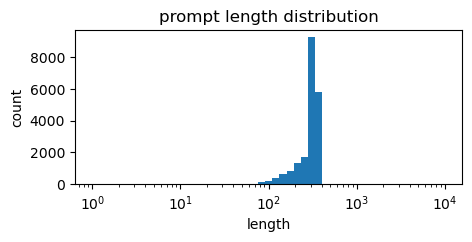

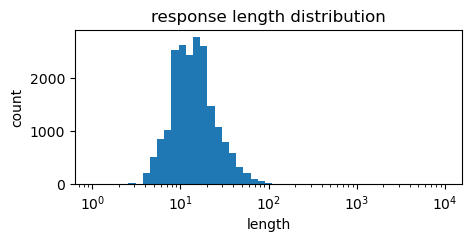

In [28]:
import matplotlib.pyplot as plt

# see prompt length distribution
plt.figure(figsize=(5, 2))
plt.hist([item['prompt_tokenized_length'] for item in train_data], bins=np.logspace(0, 4, 50))
plt.xscale('log');plt.xlabel('length');plt.ylabel('count');plt.title('prompt length distribution');plt.show()

# see response length distribution
plt.figure(figsize=(5, 2))
plt.hist([item['response_tokenized_length'] for item in train_data], bins=np.logspace(0, 4, 50))
plt.xscale('log');plt.xlabel('length');plt.ylabel('count');plt.title('response length distribution');plt.show()

### 调整数据频率

In [43]:

def adjust_data_frequency(train_data):
    for item in train_data:
        frequency=1
        if len(item['response'])<5:
            frequency=0.1
        elif len(item['response'])<10:
            frequency=0.2
        elif len(item['response'])<20:
            frequency=1
        elif len(item['response'])<50:
            frequency=2
        else:
            frequency=5
        if item['task']=='interview':
            frequency*=len(all_content)/len(all_interview)/roleplay_propotion*interview_propotion
        frequency*=1
        for _i in range(int(frequency)):
            yield item    

train_data_argumented=list(adjust_data_frequency(train_data))



for item in random.sample(train_data_argumented, 10):
    print(item['prompt'][-50:], end='》》')
    print(item['response'])
    print()


    
import random
random.seed(42)
random.shuffle(train_data_argumented)

成这样？自己是不是也会变成这样？)
【深蓝色火粉沾在他们身上】
记者：你们为什么要寻找我？
玛琼琳：》》我不知道，他们只是内心有一股冲动驱使他们去寻找我。

内，形貌便能‘自在’显现。
悠二：呼~恩，确实只要一提到与火有关的魔神，通常都回带着刀或剑。
悠二：》》(他对于‘魔神’的印象顶多是来自在国营电视台看过的不动明王，或者是过去不知名的特效电影中所出现的陶俑那一类的程度而已。)

… \emoji 害羞
悠二：吉田同学？ \emoji 惊讶
【夏娜是个火雾战士，比较冷淡】
吉田：》》那……那个，小缘，刚刚，体育课的时候，真……谢谢你。 \emoji 害羞

涉别人的行动了？】
【既然左右双翼已经断了，那家伙也到此为止了】
评论员：你在回忆什么？
火雾战士：》》我在回忆一场兵荒马乱的战斗，一身黑衣飘扬的女子慢条斯理地说道：到这里就够了，接下来由我跟亚拉斯特尔来处理。

想，应该是我所编写的调音自在法，受到某种干扰的结果
【玛琼琳和某人在讨论扭曲现象的来源】
贝海默特：》》呼嗯，看来是这样没错，事实上，我们也大致猜到是哪个‘使徒’会做出这种事。

……那个，请问……
魔神：怎么了，还不快跑！
悠二：\me 横越马路
悠二：\me 跑上堤防
悠二：》》(一想到曾经在这里欣赏到的美景，这分差事便不觉得辛苦)

。】
梅利希姆：对，就像这样。
少女：！
少女：\me 感觉到梅利希姆体内凝聚了‘两股’力量
夏娜：》》(攻击力逐渐增强当中——)

…然后破坏现在这层才开始建立关系的话……)
【主角意识到自己的懦弱和半吊子的觉悟，感到自责】
主角：》》(自己对于坂井悠二繁荣感情，难道脆弱到仅仅因为内心一个忧虑，就准备打退堂鼓了吗？)

中燃烧着一团炽盛火焰，底部没有燃料，只有一个银制的空水盘】
问询人：你为什么要成为火雾战士？
夏娜：》》我一开始就是为了成为火雾战士而活，而且自己并没有感到任何不满，这一切她都明白。同时也在学习之中得知，成为火雾战士就不再是人类，永无至尽的战斗之路，以及战斗这件事情本身。尽管内心对于这一切怀抱着不安、恐惧、踌躇，却还是充满了坚强、冀望、渴求与决心。

了！
夏娜：\me 灌输翅膀的力量，加速前进
【巨狼踩碎大楼崩坍的屋顶，瓦砾掉落在两人头上】
巨狼：》》咆噢噢噢噢噢噢噢噢噢！！



### 保存训练数据到json

In [44]:
#pick test data randomly
output_test_data=random.sample(train_data_argumented, test_data_size)

# remove test data from train data
output_train_data=[item for item in train_data_argumented if item not in output_test_data]

json.dump(output_train_data, open(train_data_path, 'w', encoding='utf-8'), ensure_ascii=False, indent=2)
print('Saved to', train_data_path)
print('Total train data:', len(output_train_data))
import random
random.seed(42)

json.dump(output_test_data, open(test_data_path, 'w', encoding='utf-8'), ensure_ascii=False, indent=2)
print('Saved to', test_data_path)
print('Total test data:', len(output_test_data))

Saved to ./train.json
Total train data: 31640
Saved to ./test.json
Total test data: 200


In [45]:
try:
    del tokenizer,embeddings,vector_store
except:
    pass
import torch
torch.cuda.empty_cache()

In [ ]:
!.\train_roleplaying.bat